In [0]:
#import the all vision library from the fastai
from fastai.vision import*

In [0]:
#import the metrics fro the fastai
from fastai.metrics import*

In [0]:
#import matplotlib
import matplotlib.pyplot as plt


In [6]:
#set the path of the datasets an download the data
path=untar_data(URLs.MNIST);path

PosixPath('/root/.fastai/data/mnist_png')

In [0]:
#create the databuche of the datasets
data =ImageDataBunch.from_folder(path, train='training', valid='testing', size=32)

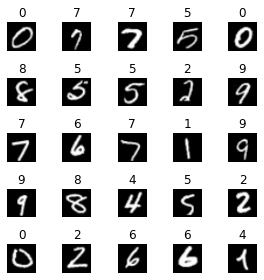

In [12]:
#show the databunches
data.show_batch(row=3,figsize=(4,4))

In [13]:
#show the classes of the datasets 
data.classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [14]:
#create the model
model=cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [15]:
#train the models
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.513640,0.324442,0.102800,01:04
1,0.211733,0.117742,0.037600,01:03
2,0.135196,0.079718,0.024300,01:03
3,0.100554,0.068112,0.021500,01:03


In [0]:
#save the models 
model.save('mnistmodel')

In [17]:
#Interpretation from classifie
intr=ClassificationInterpretation.from_learner(model)

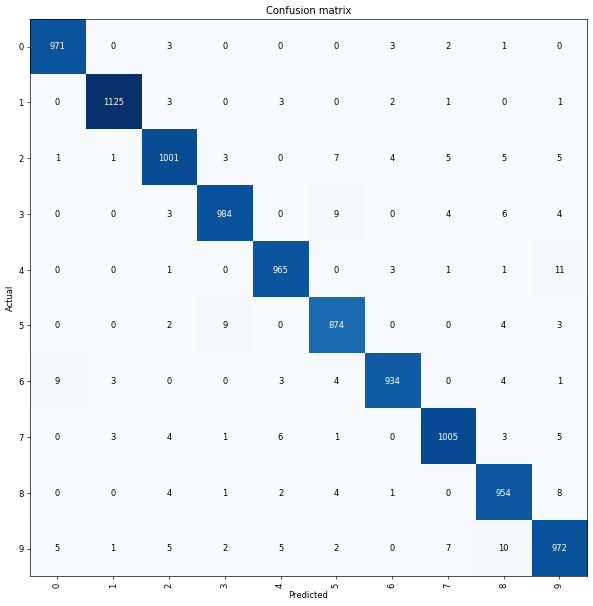

In [18]:
#plot the confusion matrix
intr.plot_confusion_matrix(figsize=(10,10),dpi=60)

9985 misclassified samples over 10000 samples in the validation set.


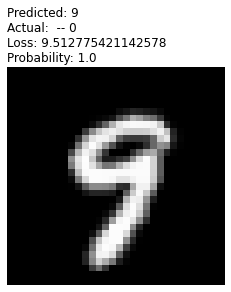

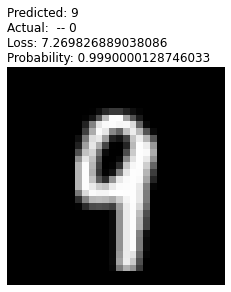

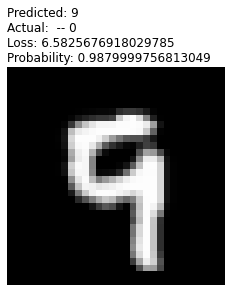

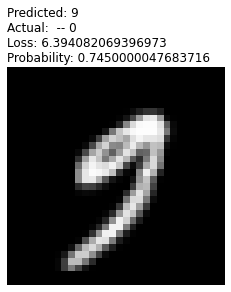

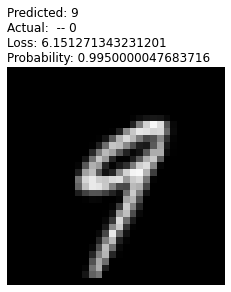

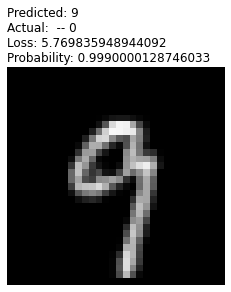

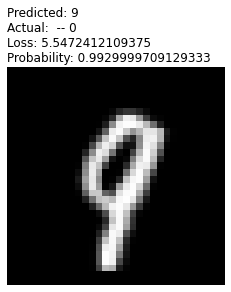

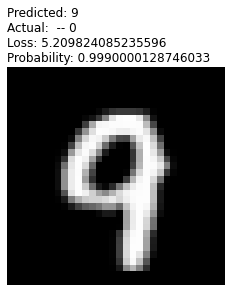

In [21]:
#plot the top 8 losses
intr.plot_multi_top_losses(8,figsize=(4,4))

In [22]:
#print the most confused data durring trainig
intr.most_confused()

[('4', '9', 11),
 ('9', '8', 10),
 ('3', '5', 9),
 ('5', '3', 9),
 ('6', '0', 9),
 ('8', '9', 8),
 ('2', '5', 7),
 ('9', '7', 7),
 ('3', '8', 6),
 ('7', '4', 6),
 ('2', '7', 5),
 ('2', '8', 5),
 ('2', '9', 5),
 ('7', '9', 5),
 ('9', '0', 5),
 ('9', '2', 5),
 ('9', '4', 5),
 ('2', '6', 4),
 ('3', '7', 4),
 ('3', '9', 4),
 ('5', '8', 4),
 ('6', '5', 4),
 ('6', '8', 4),
 ('7', '2', 4),
 ('8', '2', 4),
 ('8', '5', 4),
 ('0', '2', 3),
 ('0', '6', 3),
 ('1', '2', 3),
 ('1', '4', 3),
 ('2', '3', 3),
 ('3', '2', 3),
 ('4', '6', 3),
 ('5', '9', 3),
 ('6', '1', 3),
 ('6', '4', 3),
 ('7', '1', 3),
 ('7', '8', 3),
 ('0', '7', 2),
 ('1', '6', 2),
 ('5', '2', 2),
 ('8', '4', 2),
 ('9', '3', 2),
 ('9', '5', 2),
 ('0', '8', 1),
 ('1', '7', 1),
 ('1', '9', 1),
 ('2', '0', 1),
 ('2', '1', 1),
 ('4', '2', 1),
 ('4', '7', 1),
 ('4', '8', 1),
 ('6', '9', 1),
 ('7', '3', 1),
 ('7', '5', 1),
 ('8', '3', 1),
 ('8', '6', 1),
 ('9', '1', 1)]

In [0]:
#unfreeze the models
model.unfreeze()

In [25]:
#again train the model
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.092988,0.050450,0.014600,01:10
1,0.051587,0.034371,0.009700,01:10
2,0.026166,0.019128,0.005800,01:09
3,0.010649,0.012155,0.004000,01:08


In [26]:
#load the previous model 
model.load('mnistmodel')

Learner(data=ImageDataBunch;

Train: LabelList (60000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
9,9,9,9,9
Path: /root/.fastai/data/mnist_png;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      

In [28]:
#find the laerning rate
model.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


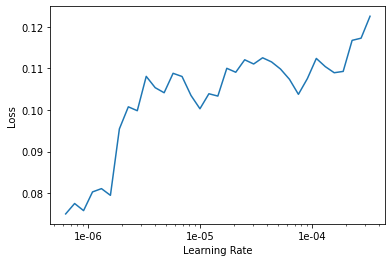

In [29]:
#plot the learning model
model.recorder.plot()

In [31]:
#again finally train the model
model.fit_one_cycle(3, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.076664,0.041720,0.012700,01:11
1,0.042974,0.030028,0.010300,01:11
2,0.026950,0.025526,0.008800,01:11


In [0]:
finally train the model with 0.08% losses